In [2]:
import pandas as pd
import glob
import numpy as np
from sklearn import svm
from sklearn import preprocessing
from sklearn.cross_validation import StratifiedKFold, train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.grid_search import GridSearchCV
from sklearn import neighbors
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.externals import joblib
import random
import seaborn as sns
import matplotlib.pyplot as plt
from os import sys, path

THRESHOLD = 20
IRMAS = 1
PHILHARMONIA = 2
MIS = 3
sns.set()

In [18]:
def feature_preprocessing(dataset):
    if(dataset == IRMAS):
        # import wav files to build features
        files = glob.glob('Datasets\*.csv')
        dfs = []
        for filename in files:
            dfs.append(pd.read_csv(filename))     
        # Concatenate all dataFrames into a single DataFrame
        data = pd.concat(dfs, ignore_index=True)
        data.fillna(0, inplace=True)
        
    if(dataset == PHILHARMONIA):
        files = glob.glob('Datasets\philharmoni\*.csv')
        dfs = []
        for filename in files:
            dfs.append(pd.read_csv(filename))
        # Concatenate all dataFrames into a single DataFrame
        data = pd.concat(dfs, ignore_index=True)
        
    if(dataset == MIS):
        files = glob.glob('Datasets\MIS_Dataset\*.csv')
        dfs = []
        for filename in files:
            dfs.append(pd.read_csv(filename))     
        # Concatenate all dataFrames into a single DataFrame
        data = pd.concat(dfs, ignore_index=True)
        data.fillna(0, inplace=True)
    print "Done reading the music files"
    
    print "Transform the features and target value to fit"
    X = data.drop(['class'], axis=1).values
    
    X = preprocessing.Imputer().fit_transform(X)
    y = data['class']

    steps = [("scale", preprocessing.StandardScaler()),
              ('anova_filter', SelectKBest(mutual_info_classif, k=100)),
              ('svm', svm.SVC(decision_function_shape='ovo'))]

    model = Pipeline(steps)
    return model, X, y

In [3]:
def saveModel(model, dataset):
    if dataset ==IRMAS:
        joblib.dump(model, 'irmas2.model')
    if dataset == PHILHARMONIA:
        joblib.dump(model, 'Philharmonia2.model')
    if dataset ==MIS:
        joblib.dump(model, 'mis1.model')
    return

In [4]:
def loadModel(dataset):
    if dataset ==IRMAS:
        model = joblib.load('irmas3.model')
    if dataset == PHILHARMONIA:
        model = joblib.load('Philharmonia2.model')
    if dataset ==MIS:
        model = joblib.load('mis1.model')
    return model

In [6]:
def train_test(clf, X_train, y_train, dataset):
    print("Fitting the data")
    clf.fit(X_train, y_train)
    print("Save the model")
    saveModel(clf, dataset)
    print("Testing the model")
    y_pred = clf.predict(X_train)    
    print("Quantify the performance")
    Evaluate_accuracy(y_pred, y_train)

    return


In [39]:
def Evaluate_accuracy(pred, true_value):
    print("Accuracy score is ", accuracy_score(true_value, pred)*100)
    rmse = np.sqrt(mean_squared_error(true_value, pred))
    print("Root Mean Squared Error: {}".format(rmse))
    print("Mean absolute error:", mean_absolute_error(true_value,pred))
    print "Micro stats:"
    print precision_recall_fscore_support(true_value, pred, average='micro')
    print "Macro stats:"
    print precision_recall_fscore_support(true_value, pred, average='macro')
    
    print("Classification Report: ")
    cr = classification_report(true_value, pred)
    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = ['Unknown', 'Piano','Organ', 'Guitar','Acoustic guitar','Mandolin','Electric guitar','Violin','Cello','Trumpet','Sax','Clarinet','Flute','Banjo','Voice', 'Avg']
    rep = np.array(precision_recall_fscore_support(true_value, pred)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)
    plt.title('Classification Report (Normalized)')
    rep =rep.astype('float') / rep.sum(axis=1)[:, np.newaxis]
    sns.heatmap(rep, annot=True, xticklabels=xticks, yticklabels=yticks, cmap="BuGn")
    plt.show()
    
    plt.title('Confusion matrix  :')
    cm=confusion_matrix(true_value,pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.subplots(figsize=(15,10))
    inst = ['Unknown instrument', 'Piano','Organ', 'Guitar','Acoustic guitar','Mandolin','Electric guitar','Violin','Cello','Trumpet','Sax','Clarinet','Flute','Banjo','Voice']
    sns.heatmap(cm, annot=True, xticklabels=inst, yticklabels=inst, fmt=".2f", linewidths=.5, cmap="Blues")
    
    plt.xlabel('Predicted instrument code')
    plt.ylabel('True value')
    plt.show()
    return

Training and testing on IRMAS dataset
Done reading the music files
Transform the features and target value to fit
Fitting the data
Save the model
Testing the model
Quantify the performance
('Accuracy score is ', 71.461879225926793)
Root Mean Squared Error: 10.2347248121
('Mean absolute error:', 4.2853034895469033)
Micro stats:
(0.71461879225926794, 0.71461879225926794, 0.71461879225926794, None)
Macro stats:
(0.75093259483969033, 0.73832350327427787, 0.72985875750350049, None)
Classification Report: 


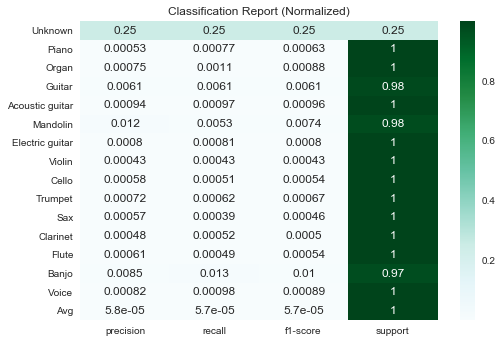

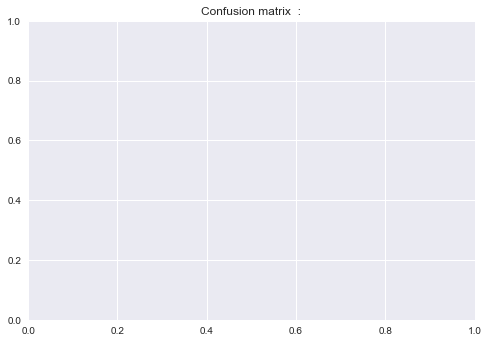

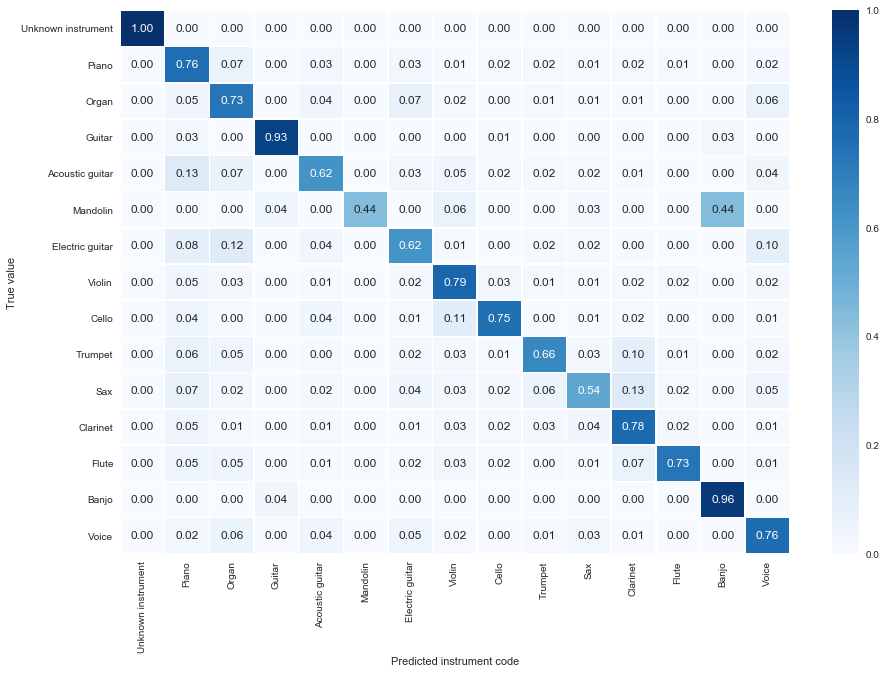

Training and testing on PHILHARMONIA dataset
Training and testing on IOWA MIS dataset


In [40]:
if __name__ == "__main__":
    print("Training and testing on IRMAS dataset")
    classifier, X, y = feature_preprocessing(IRMAS)
    train_test(classifier, X, y, IRMAS)
    print("Training and testing on PHILHARMONIA dataset")
    #classifier, X, y = feature_preprocessing(PHILHARMONIA)
    #train_test(classifier, X, y, PHILHARMONIA)
    print("Training and testing on IOWA MIS dataset")
    #classifier, X, y = feature_preprocessing(MIS)
    #train_test(classifier, X, y, MIS)
    #model1 = loadModel(IRMAS)
    #test(model1, X, y)
    
    #model2 = loadModel(RWC)
    #test(model2, X, y)
    
    #model3 = loadModel(PHILHARMONIA)
    #test(model3, X, y)


---------------------------------------------------------------------------------------
Training and testing on IRMAS dataset(and rwc)
Done reading the music files
1
(12051L, 372L)
(12051L,)
Fitting the data
Save the model
Testing the model
Quantify the performance
('Accuracy score is ', 68.558625840179246)
Root Mean Squared Error: 3.34109129573
('Mean absolute error:', 1.5432744170608248)
Micro stats:
(0.68558625840179244, 0.68558625840179244, 0.68558625840179244, None)
Macro stats:
(0.71898022698999386, 0.70117690730693982, 0.68939606489333938, None)
('Classification Report: ', '             precision    recall  f1-score   support\n\n          0       0.39      0.73      0.50       722\n          1       0.47      0.72      0.57       682\n          2       0.99      0.95      0.97       106\n          3       0.58      0.58      0.58       637\n          4       1.00      0.44      0.61        80\n          5       0.58      0.62      0.60       760\n          6       0.80      0.79      0.80      1835\n          7       0.79      0.71      0.75      1277\n          8       0.76      0.63      0.69      1062\n          9       0.78      0.51      0.62      1358\n         10       0.74      0.72      0.73      1351\n         11       0.95      0.70      0.80      1329\n         12       0.62      0.99      0.76        74\n         13       0.62      0.73      0.67       778\n\navg / total       0.72      0.69      0.69     12051\n')

Training and testing on RWC dataset
Done reading the music files
2
(3544L, 368L)
(3544L,)
Fitting the data
Save the model
Testing the model
Quantify the performance
('Accuracy score is ', 83.267494356659142)
Root Mean Squared Error: 4.93881868695
('Mean absolute error:', 1.2751128668171559)
Micro stats:
(0.83267494356659144, 0.83267494356659144, 0.83267494356659144, None)
Macro stats:
(0.87961986518969237, 0.79530164377962864, 0.81644049595788171, None)
('Classification Report: ', '             precision    recall  f1-score   support\n\n          0       0.89      0.92      0.90        36\n          1       1.00      0.83      0.91        30\n          2       0.91      1.00      0.95        10\n          3       0.97      0.86      0.91        42\n          4       0.84      0.88      0.86        24\n          5       1.00      0.60      0.75        20\n          6       0.91      0.96      0.93        45\n          7       1.00      0.55      0.71        22\n          8       0.92      1.00      0.96        36\n          9       0.87      1.00      0.93        27\n         10       1.00      0.92      0.96        36\n         11       1.00      0.59      0.74        27\n         12       1.00      0.98      0.99        43\n         13       0.91      0.92      0.91        63\n         14       0.70      0.82      0.76        57\n         15       0.66      0.88      0.75        57\n         16       0.87      0.82      0.85        57\n         17       0.92      0.85      0.88        65\n         18       0.94      0.95      0.95        66\n         19       0.91      1.00      0.95       252\n         20       0.82      0.89      0.86        90\n         21       0.94      0.98      0.96       105\n         22       1.00      0.89      0.94        18\n         23       0.56      0.69      0.62        54\n         24       0.87      0.70      0.78        37\n         25       1.00      0.58      0.73        38\n         26       0.77      0.54      0.63        37\n         27       0.96      0.67      0.79        36\n         28       1.00      0.78      0.88        36\n         29       1.00      0.75      0.86        36\n         30       0.97      0.83      0.90        36\n         31       1.00      1.00      1.00        38\n         32       1.00      0.77      0.87        39\n         33       0.97      0.83      0.90        36\n         34       1.00      0.79      0.89        39\n         35       0.00      0.00      0.00        18\n         36       0.91      0.77      0.83        39\n         37       0.82      0.87      0.85        63\n         38       1.00      1.00      1.00        12\n         39       1.00      0.35      0.52        37\n         40       1.00      0.07      0.12        76\n         41       0.75      0.65      0.70       188\n         42       0.69      0.90      0.78       262\n         43       0.76      0.89      0.82       184\n         44       0.94      0.80      0.86       162\n         45       0.72      0.95      0.82       162\n         46       0.72      0.91      0.80       162\n         47       0.80      0.91      0.85       162\n         48       0.95      0.75      0.84       162\n         49       0.84      0.94      0.89       165\n\navg / total       0.85      0.83      0.82      3544\n')
C:\Users\Admin\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)

Training and testing on PHILHARMONICA dataset
Done reading the music files
3
(5345L, 372L)
(5345L,)
Fitting the data
Save the model
Testing the model
Quantify the performance
('Accuracy score is ', 97.343311506080454)
Root Mean Squared Error: 0.600436386363
('Mean absolute error:', 0.070907390084190836)
Micro stats:
(0.97343311506080454, 0.97343311506080454, 0.97343311506080454, None)
Macro stats:
(0.94799850484804005, 0.93801257128445081, 0.93641155563669853, None)
('Classification Report: ', '             precision    recall  f1-score   support\n\n          0       0.97      0.97      0.97       106\n          1       0.98      0.64      0.77        80\n          2       0.98      0.98      0.98      1255\n          3       0.97      0.97      0.97       889\n          4       0.99      0.95      0.97       485\n          5       0.98      0.97      0.97       732\n          6       0.97      0.99      0.98       846\n          7       1.00      1.00      1.00       878\n          8       0.70      0.97      0.81        74\n\navg / total       0.98      0.97      0.97      5345\n')



MIS dataset:
('Accuracy score is ', 99.387254901960787)
Root Mean Squared Error: 0.598199914121
('Mean absolute error:', 0.046568627450980393)
Micro stats:
(0.99387254901960786, 0.99387254901960786, 0.99387254901960786, None)
Macro stats:
(0.99363381716322885, 0.98621107476069303, 0.98958542764970203, None)



irmas dataset+rwc+mis( model2:
('Accuracy score is ', 71.461879225926793)
Root Mean Squared Error: 10.2347248121
('Mean absolute error:', 4.2853034895469033)
Micro stats:
(0.71461879225926794, 0.71461879225926794, 0.71461879225926794, None)
Macro stats:
(0.75093259483969033, 0.73832350327427787, 0.72985875750350049, None)